# Labrapport TFY4125 Fysikk Vår 2024
*Skriv fullt navn på gruppas medlemmer samt dato for innlevering.*

Navn:  <br>
Institutt for Fysikk, NTNU <br>
Dato: 


## Sammendrag
*Skriv en kort oppsummering av labprosjektet. Skriv denne delen helt til slutt. Beskriv eksperimentet og de numeriske beregningene. Fokuser på resultatene. Oppgi midlere tap i mekanisk energi med tilhørende usikkerhet (standardfeil). Bruk maksimalt 5 setninger.*

## Ren rulling på krum bane - teoretisk grunnlag
Figuren nedenfor viser ei kule som ruller på et krumt underlag, med krumning henholdsvis oppover (øverst) og nedover (nederst). I figuren angis tyngdekraften $Mg$ og de to komponentene av kontaktkraften fra underlaget på kula, henholdsvis normalkraften $N$ og friksjonskraften $f$. Dessuten er både hastigheten $v$, baneakselerasjonen $a$ og sentripetalakselerasjonen $a_\perp$ illustrert. Ved perfekt ren rulling - uten andre former for friksjon enn den statiske friksjonen $f$ som virker i kontaktpunktet mellom kula og underlaget - er kulas mekaniske energi bevart. Da er kulas hastighet entydig bestemt av endringen $y$ i den vertikale posisjonen til kulas massesenter via
$$\frac{1}{2} (1+c) Mv^2 = Mgy,$$
idet vi antar at kula starter med hastighet $v=0$ i høyden $y=0$. Dersom kula er kompakt med uniform massefordeling, er $c=2/5$, slik at 
$$v(y) = \sqrt{\frac{10}{7}gy}.$$
Kulas baneakselerasjon blir dermed 
$$a = \frac{dv}{dt} = \frac{dv}{dy}\,\frac{dy}{dt} = \sqrt{\frac{5g}{14y}}\,v_y.$$
Her er $v_y = v \sin\beta = \sqrt{10gy/7}\sin\beta$ slik at
$$a = -\frac{5g\sin\beta}{7}.$$
Her er $\beta$ banens lokale helningsvinkel, knyttet til banens geometriske form $y(x)$ ved at
$$\frac{dy}{dx} = \tan\beta.$$
Vi innser nå at de to siste ligningene har konsistente fortegn: Kula ruller åpenbart saktere og saktere i motbakke.
Da er både $\sin\beta$ og $\tan\beta$ positive størrelser dersom $\beta > 0$.
Friksjonskraften kan nå bestemmes ved hjelp av Newtons 2. lov:
$$f - Mg\sin\beta = Ma = -\frac{5Mg\sin\beta}{7},$$
dvs
$$f = \frac{2Mg\sin\beta}{7}.$$
Retningen på $f$ må være konsistent med at vinkelfarten øker i nedoverbakke og minker i oppoverbakke. Av den grunn peker $f$ alltid oppover langs banen. Vi ser at fortegnet stemmer: Motbakke og $\beta > 0$ gir $f>0$, dvs framover og oppover. Utforbakke og $\beta < 0$ gir $f<0$, dvs bakover og oppover. <br>
Endelig kan normalkraften bestemmes ved hjelp av Newtons 2. lov i retning normalt på banen:
$$N - Mg\cos\beta = M a_\perp = M v^2/R.$$
Her er $R$ banens krumningsradius, gitt ved
$$R = \frac{[1+(y')^2]^{3/2}}{y''},$$
med $y' = dy/dx$ og $y'' = d^2y/dx^2$. Normalkraften har selvsagt retning oppover til enhver tid (dvs med positiv $y$-komponent). Sentripetalakselerasjonen har retning inn mot sentrum av den tenkte sirkelen med radius $R$. Når banen krummer oppover, er $y'' > 0$ og $R > 0$ i siste ligning. Det betyr at fortegnet stemmer: $N$ er større enn tyngdens normalkomponent $Mg\cos\beta$ når banen krummer oppover. Og omvendt: Når banen krummer nedover, er $y'' < 0$ og $R < 0$ i siste ligning. Det gir en normalkraft $N$ som er mindre enn tyngdens normalkomponent. Av erfaring vet vi at dette stemmer: Kjører vi fort nok på ski over en 'kul', kan vi helt miste kontakten med underlaget, dvs $N=0$. Her skal vi sørge for at baneformen $y(x)$ er slik at den rullende kula hele tiden har god kontakt med underlaget.

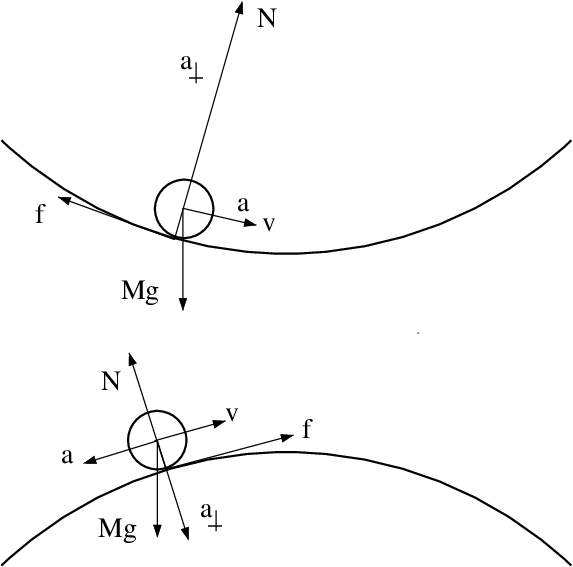

In [3]:
from IPython import display
display.Image("./krefter.png", width=400)

<b>Figur 1.</b> Kule som ruller på et krumt underlag. Her er $v$ kulas fart,
$a$ er baneakselerasjon, $a_\perp$ er sentripetalakselerasjon, $Mg$ er tyngdekraft,
$f$ er friksjonskraft og $N$ er normalkraft. Banens helningsvinkel $\beta$ er vinkelen mellom
positiv $x$-akse (horisontal og mot høyre) og retningen til $v$. <br><br>

## Baneform med kubiske *splines*

Baneformen fastlegges ved hjelp av tredjegradspolynomer på de 7 intervallene mellom de 8 tilfeldig valgte skruefestehøydene, slik at både banen $y(x)$, banens deriverte $dy/dx$ og banens andrederiverte $d^2y/dx^2$ er kontinuerlige i skruefestene. Dette gjøres i Python med funksjonen CubicSpline fra SciPy-biblioteket interpolate med kommandoen

*cs = CubicSpline(xfast,yfast,bc_type='natural')*

Her er xfast og yfast tabeller (numpy arrays) med henholdsvis horisontale og vertikale koordinater for skruefestene, og med *bc_type='natural'* velges krumning lik null i de to ytterste skruefestene. Horisontal avstand mellom skruefestene er 200 mm slik at xfast = (0,0.200,...,1.400) m. Vertikale koordinater for skruefestene fastlegges ved å trekke tilfeldige tall med numpy-funksjonen random.randint.


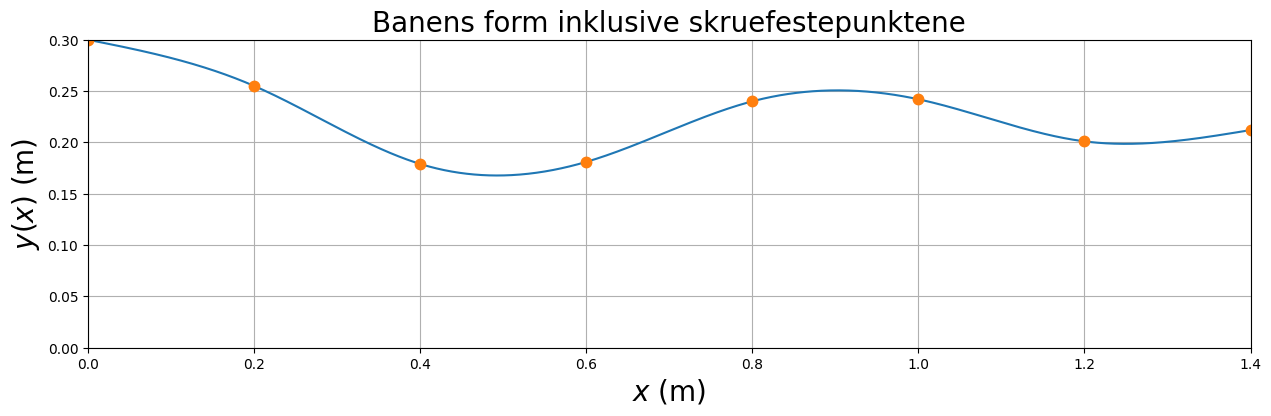

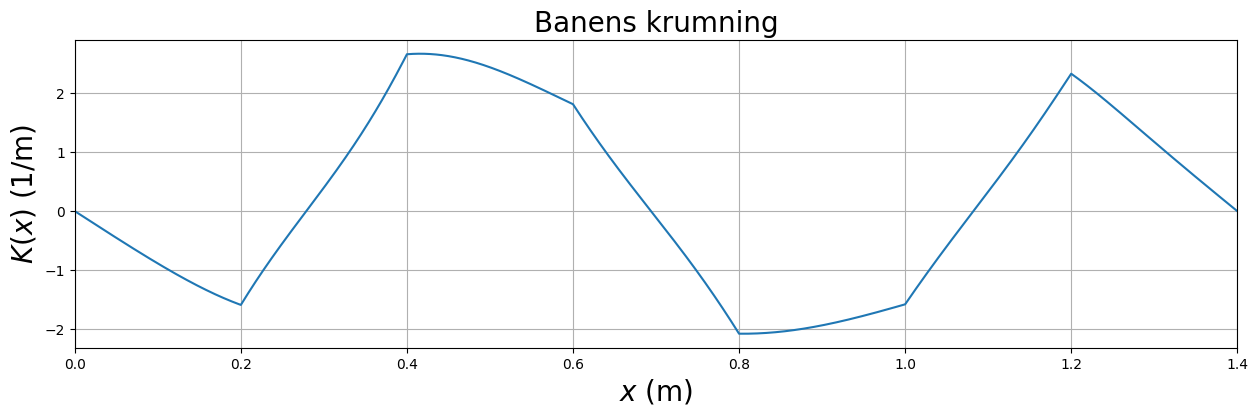

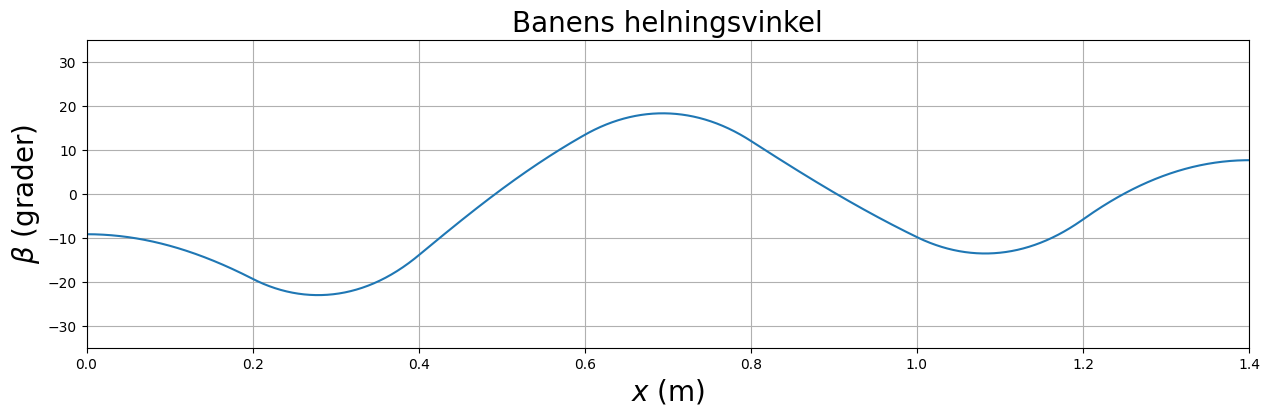

Bakketoppens høyeste punkt (m):  0.251
Banens laveste punkt (m):  0.168
Helningsvinkel i startposisjonen (grader): -9.2
Banens maksimale helningsvinkel (grader): 23.0
Banens minste krumningsradius (m):  0.375
De 8 festepunkthøydene (m): [0.3   0.255 0.179 0.181 0.24  0.242 0.201 0.212]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

#Tallverdier. Tryggest med SI-enheter fra start til mål!
M = 0.031    #kg
g = 9.81     #m/s**2
c = 2/5
h = 0.200    #m
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1.401
dx = 0.001
x = np.arange(xmin, xmax, dx)
Nx = len(x)

#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 0.300
yfast[1] = yfast[0] - np.random.randint(40,60)/1000
yfast[2] = yfast[1] - np.random.randint(70,90)/1000
yfast[3] = yfast[2] + np.random.randint(-30,10)/1000
yfast[4] = yfast[3] + np.random.randint(30,70)/1000
yfast[5] = yfast[4] + np.random.randint(-20,20)/1000
yfast[6] = yfast[5] - np.random.randint(40,80)/1000
yfast[7] = yfast[6] + np.random.randint(-40,40)/1000

#Kjør denne cellen så mange ganger dere vil, inntil dere får en baneform dere er fornøyd med.
#Når endelig baneform er valgt:
#Sett inn skruehøydene med 3 desimaler (m) og fjern kommentarsymbolet ("#") i neste linje.
#yfast = np.asarray([0.300,,,,,,,])
#Når endelig baneform er valgt, kan dere gjerne legge inn # i starten på de 8 linjene som beregner yfast[] ovenfor

#Beregninger:
cs = CubicSpline(xfast, yfast, bc_type='natural')
#y = baneformen y(x)
y = cs(x)
#dydx = dy/dx = y'(x) (dimensjonsløs)
dydx = cs(x,1)
#d2ydx2 = y''(x) (enhet 1/m)
d2ydx2 = cs(x,2)
#K = 1/R = banens krumning (1/m)
K = d2ydx2/(1+dydx**2)**(1.5)
#R = banens krumningsradius (m)
#En liten verdi 1E-8 legges til i nevneren for å unngå divisjon med null
R = 1/(np.abs(K)+1E-8)
#Rmin = minste verdi av krumningsradien
Rmin = np.min(R)
#beta = banens helningsvinkel (rad)
beta = np.arctan(dydx)
#betadeg = banens helningsvinkel (grader)
betadeg = beta*180/np.pi
#startvinkel = helningsvinkel i startposisjonen (grader)
startvinkel = betadeg[0]
#maksvinkel = banens maksimale helningsvinkel, i absoluttverdi (grader)
maksvinkel = np.max(np.abs(betadeg))

#Plotting av banens form y(x)
plt.figure(figsize=(15,4))
plt.plot(x,y)
plt.plot(xfast,yfast,'.',markersize=15)
plt.title('Banens form inklusive skruefestepunktene',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0,0.300)
plt.xlim(0,1.400)
plt.grid()
plt.show()

#Plotting av banens krumning
plt.figure(figsize=(15,4))
plt.plot(x,K)
plt.title('Banens krumning',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$K(x)$ (1/m)',fontsize=20)
plt.xlim(0,1.400)
plt.grid()
plt.show()

#Plotting av banens helningsvinkel
plt.figure(figsize=(15,4))
plt.plot(x,betadeg)
plt.title('Banens helningsvinkel',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel(r'$\beta$ (grader)',fontsize=20)
plt.ylim(-35,35)
plt.xlim(0,1.400)
plt.grid()
plt.show()

y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
print('Bakketoppens høyeste punkt (m): %6.3f' %y37max)
print('Banens laveste punkt (m): %6.3f' %y27min)
print('Helningsvinkel i startposisjonen (grader): %4.1f' %startvinkel)
print('Banens maksimale helningsvinkel (grader): %4.1f' %maksvinkel)
print('Banens minste krumningsradius (m): %6.3f' %Rmin)
print('De 8 festepunkthøydene (m):', yfast)

## Numerisk beregnede fysiske størrelser
*I neste celle skal dere beregne sentrale fysiske størrelser med utgangspunkt i den valgte baneformen. Fullfør cellen med nødvendig kode slik at de ulike størrelsene beregnes og plottes i pene figurer, i samme format som figurene ovenfor. Husk enhet på alle akser. Der flere kurver vises i samme figur må det framgå hva hver enkelt kurve framstiller. Følgende størrelser skal beregnes og plottes:*
* Kulas hastighet (m/s) som funksjon av horisontal posisjon $x$ (m): 
$$v(x)=\sqrt{\frac{10g[y(0)-y(x)]}{7}}$$
* Normalkraft $N$ og friksjonskraft $f$ (N) som funksjon av $x$ (m) i samme figur: <br>
$$N = Mg\cos\beta + M v^2/R$$
$$f = \frac{2Mg\sin\beta}{7}$$
* Forholdet $|f/N|$ som funksjon av $x$ (m). <br>
* Kulas hastighet $v$ (m/s) som funksjon av tid $t$ (s). <br>
* Potensiell energi, kinetisk energi og total energi (J) som funksjon av $x$ (m). <br>

*Skriv til slutt ut tallverdier for kulas rulletid (s), slutthastighet (m/s) og tilhørende total mekanisk energi (J).* 

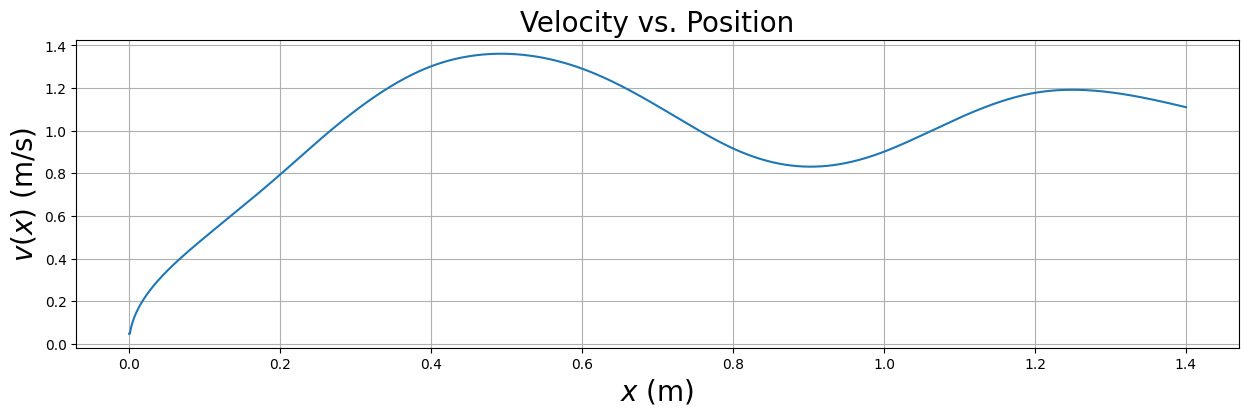

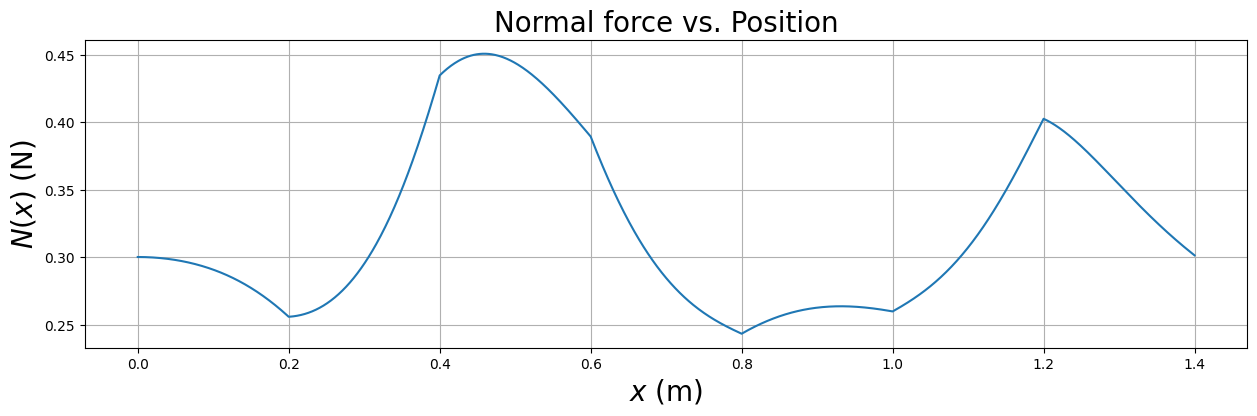

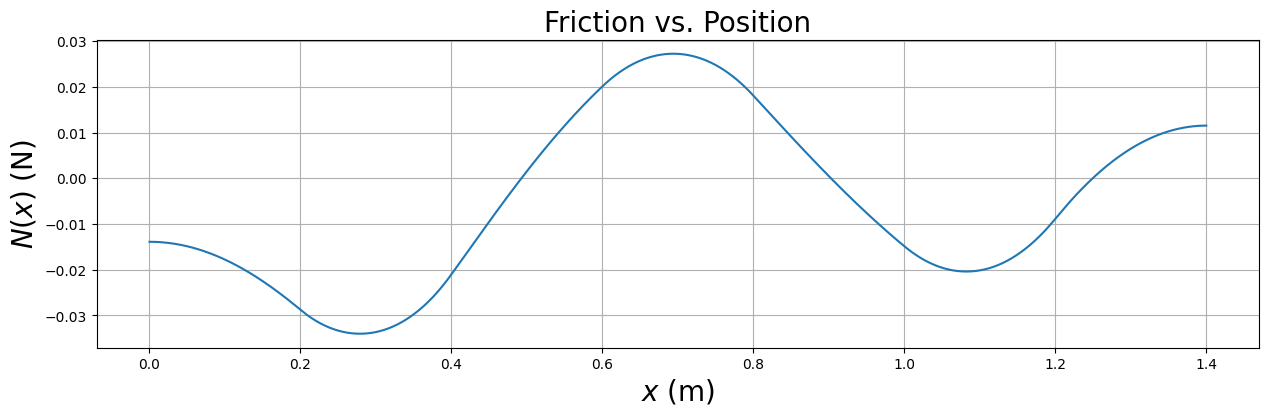

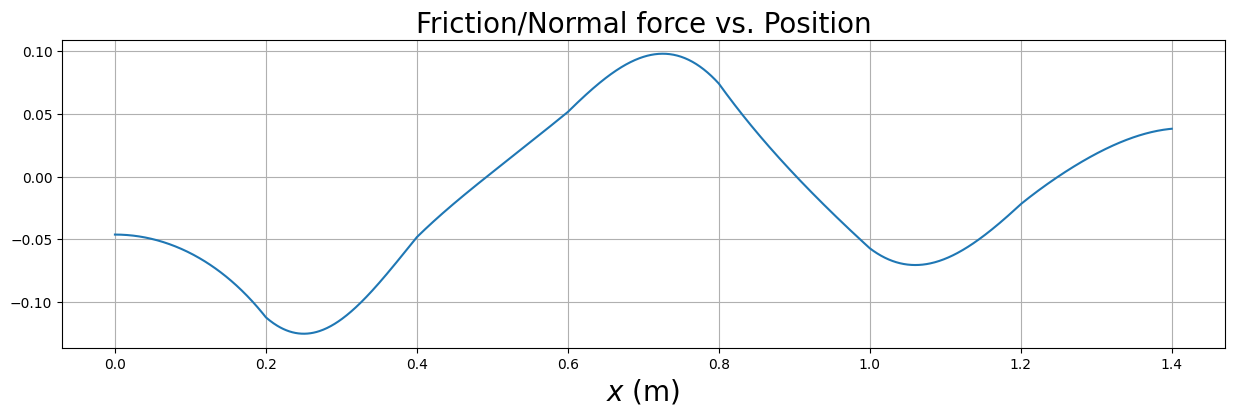

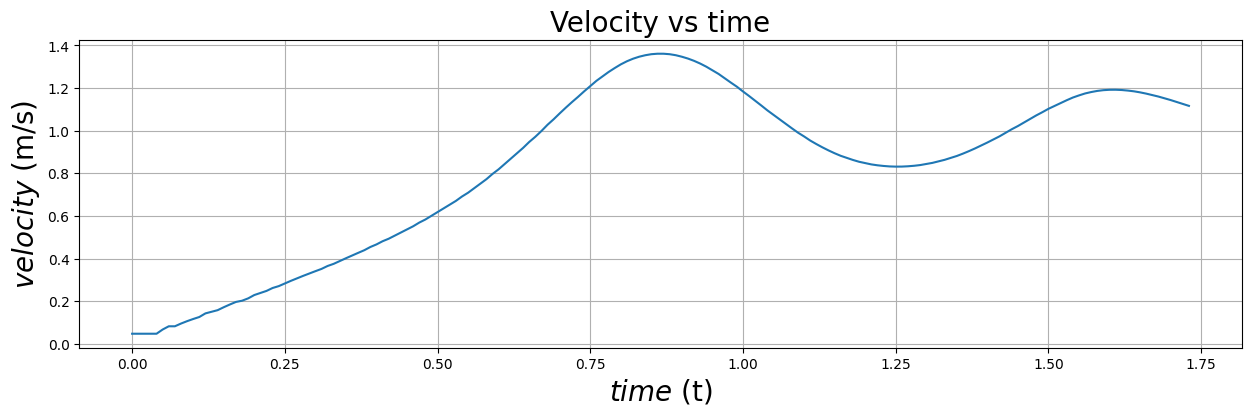

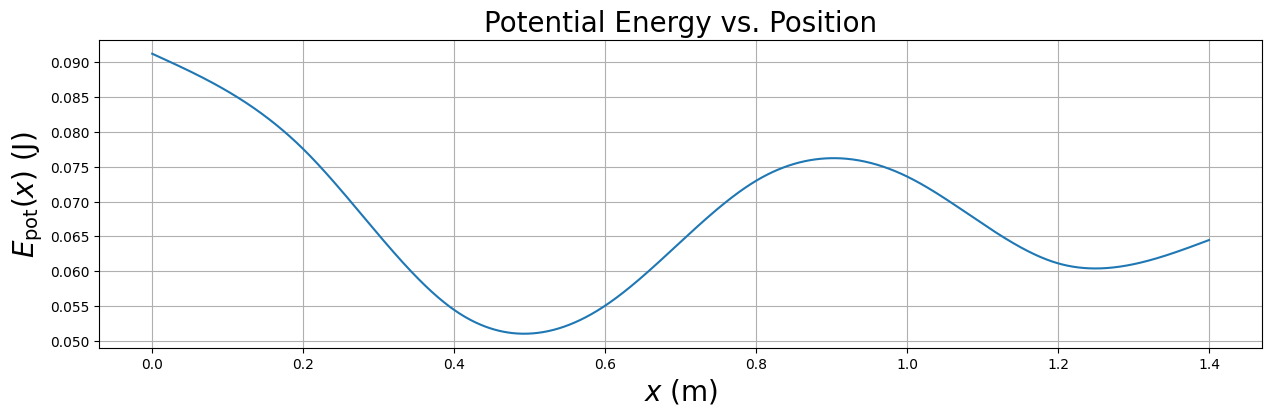

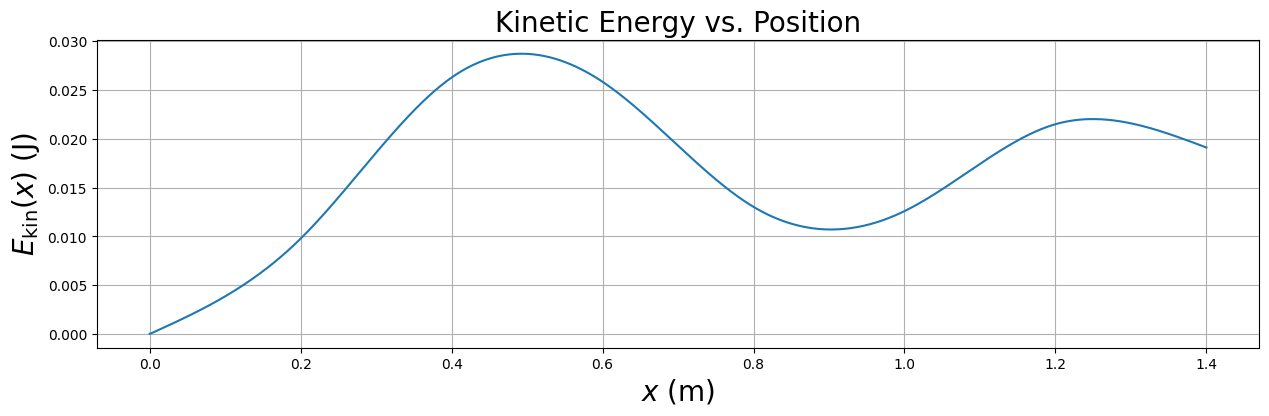

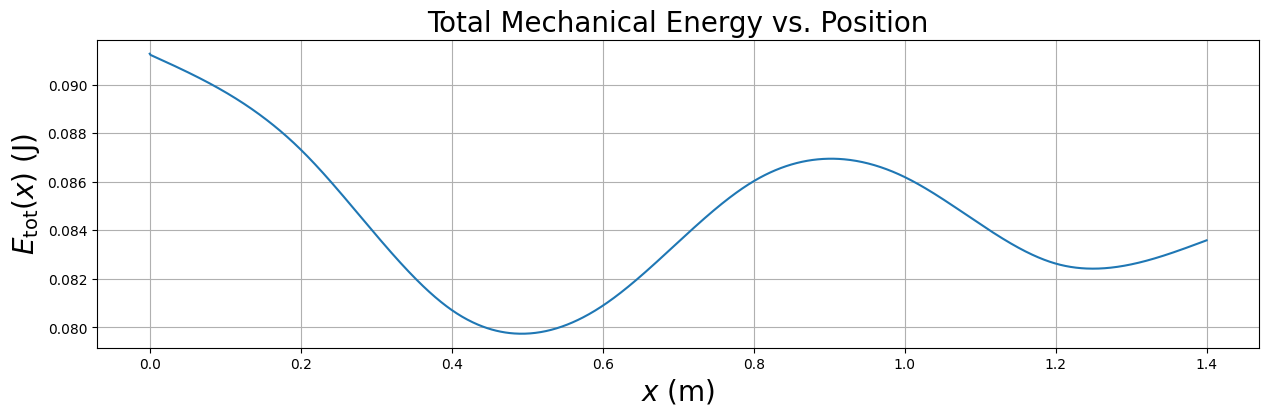

Rolling time:  1.730 seconds
Final velocity:  1.111 m/s
Total mechanical energy at the end:  0.084 J


In [5]:
# Function to avoid repeating the same code for each graph plotted
def plotter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,4))
    plt.plot(x, y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.grid()
    plt.show()

# Returns the index of the value that is closest to the parameter value.
def closest_index(array, value):
    return min(range(len(array)), key=lambda i: np.abs(value - array[i]))


# Numerisk beregning og plotting av de fysiske størrelsene v(x), N(x), f(x), f/N|, v(t), Epot(x), Ekin(x), Etot(x)

# v(x)
y_0 = y[0]  # Initial height, used to determine potential energy
v = np.sqrt((10/7)*g*(y_0 - y))  

# N(x)
a_cent = np.power(v, 2) * K             # Centripetal acceleration
N = M * (g * np.cos(beta) + a_cent)     # Normal force                                         # Normal force as a function of x

# f(x)
f = 2 * M * g * np.sin(beta) / 7 # Friction as a function of x

# f/N
f_N = f / N

# v(t)
v[0] = v[1]      # Make sure the ball rolls initially (otherwise it will forever stay still)

times = [0]
dt = 0.01
distances = [0]
speeds = [v[0]]

while distances[-1] < 1.4:
    x_k = distances[-1]
    index = closest_index(x, x_k)
    v_k = v[index]
    angle = beta[index]

    x_next = x_k + v_k*np.cos(angle)*dt
    
    distances.append(x_next)
    times.append(times[-1] + dt)
    speeds.append(v_k)

# Epot(x)
Epot = M*g*y

# Ekin(x)
Ekin = 0.5*M*v**2

# Etot(x)
Etot = Ekin + Epot

# Plot velocity v(x)
plotter(x, v, 'Velocity vs. Position', '$x$ (m)', '$v(x)$ (m/s)')

# Plot normal force N(x)
plotter(x, N, 'Normal force vs. Position', '$x$ (m)', '$N(x)$ (N)')

# Plot Friction against x
plotter(x, f, 'Friction vs. Position', '$x$ (m)', '$N(x)$ (N)')

# Friction/normal force against x
plotter(x, f_N, 'Friction/Normal force vs. Position', '$x$ (m)', '')



# Plot velocity against time
plotter(times, speeds, 'Velocity vs time', '$time$ (t)', '$velocity$ (m/s)')

# Potential energy Epot(x)
plotter(x, Epot, 'Potential Energy vs. Position', '$x$ (m)', '$E_{\mathrm{pot}}(x)$ (J)')

# Kinetic energy Ekin(x)
plotter(x, Ekin, 'Kinetic Energy vs. Position', '$x$ (m)', '$E_{\mathrm{kin}}(x)$ (J)')

# Total mechanical energy Etot(x)
plotter(x, Etot, 'Total Mechanical Energy vs. Position', '$x$ (m)', '$E_{\mathrm{tot}}(x)$ (J)')



# Utskrift av rulletid, sluttfart, total mekanisk energi


# Rolling time (s)
rolling_time = times[-1]

# Final velocity (m/s)
final_velocity = v[-1]

# Total mechanical energy at the end (J)
total_energy_at_end = Etot[-1]

# Print the results
print('Rolling time: %6.3f seconds' % rolling_time)
print('Final velocity: %6.3f m/s' % final_velocity)
print('Total mechanical energy at the end: %6.3f J' % total_energy_at_end)



## Numerisk vs eksperimentell bane

*Fra Tracker har dere eksportert eksperimentelle tallverdier for (t,x,y) til en tekstfil, f eks data.txt. I neste celle skriver dere kode som leser innholdet i data.txt og oppretter numpy arrays for (t,x,y). Det holder å lese inn data fra ett rulleforsøk. Slik importeres semikolonseparerte data fra en tekstfil data.txt:*
```python
import pandas as pd
data=pd.read_csv("data.txt",sep=";")
t_exp=np.array(data["t"])
x_exp=np.array(data["x"])
y_exp=np.array(data["y"])
```
*t_exp, x_exp og y_exp er nå tabeller (numpy arrays) med de verdiene som ble vist i kolonnene i Tracker. Første linje i fila data.txt må være <br><br>
t;x;y <br><br>
Deretter følger tallverdier for t, x og y fra og med 2. linje, f eks <br><br>
0.300;0.0016;0.3001 <br>
0.334;0.0022;0.2995 <br>
... <br><br>
Lag en figur som viser både numerisk og eksperimentell bane, dvs y(x) og y_exp(x_exp).* 

In [6]:
#Innlesing av eksperimentelle verdier for t, x og y


#Plotting av numerisk og eksperimentell bane



## Numerisk vs eksperimentell hastighet

*I neste celle kan dere bruke numpyfunksjonen gradient til å beregne den eksperimentelle hastigheten til kula, både komponentene $v_x$ og $v_y$ og absoluttverdien $v = \sqrt{v_x^2+v_y^2}$. Tips:*
```python
vx_exp = np.gradient(x_exp,t_exp)
```
*På tilsvarende vis lages vy_exp, og deretter*
```python
v_exp = np.sqrt(vx_exp**2+vy_exp**2)
```
*Lag figurer som sammenligner numerisk og eksperimentell $v(x)$, $v(t)$ og $x(t)$. Disse tre figurene gir et godt inntrykk av samsvaret mellom teoretisk og eksperimentell bevegelse.*

In [7]:
#Beregning av eksperimentell v_x, v_y og v

#Figurer som sammenligner numerisk og eksperimentell v(x), v(t) og x(t)


## Numeriske vs eksperimentelle mekaniske energier

*I neste celle beregner dere eksperimentelle mekaniske energier: Kinetisk energi (translasjonsenergi og rotasjonsenergi), potensiell energi og total mekanisk energi. Sammenlign numerisk og eksperimentell total mekanisk, kinetisk og potensiell energi i en og samme figur (i alt 6 kurver).*

In [8]:
#Beregning av eksperimentell Etrans_exp, Erot_exp, Ekin_exp, Epot_exp, Etot_exp

#Figurer som sammenligner numerisk og eksperimentell kinetisk, potensiell og total mekanisk energi


## Er den mekaniske energien bevart i rulleforsøkene?
*Fordel de 8 rulleforsøkene på gruppas medlemmer. For hvert rulleforsøk: Bruk posisjons- og fartsdata i start- og sluttpunktet fra Tracker til å beregne total mekanisk energi $E_i$ i startposisjonen (ved $x=0$) og $E_f$ i sluttposisjonen (ved $x=1.40$ m). I neste celle: Skriv de 8 verdiene for $E_i$ og $E_f$ inn i numpy arrays. Beregn 8 verdier for $\Delta E = E_i-E_f$ og deretter midlere tap i mekanisk energi med usikkerhet (den såkalte standardfeilen). Skriv ut resultatet på formen $\Delta E = (2.5 \pm 0.4)$ mJ, med egne tallverdier selvsagt. En passende enhet for $\Delta E$ er trolig mJ.*

In [9]:
#Beregning av Delta E = E_i - E_f for 8 vellykkede rulleforsøk

#Beregning av middelverdi og standardfeil for Delta E

#Utskrift av Delta E på formen Delta E = (Middelverdi +- Standardfeil) mJ


## Noen avsluttende spørsmål
*Første spørsmål tar utgangspunkt i de eksperimentelle resultatene:*
- Er beregnet middelverdi og usikkerhet for tapt mekanisk energi i samsvar med antagelsen om at kula ruller rent uten å gli? I motsatt fall: Diskuter kort noen faktorer som kan bidra til at mekanisk energi går tapt i rulleforsøkene. <br>

*De neste spørsmålene tar utgangspunkt i de teoretiske (numeriske) resultatene:* <br>
- Er grafen for $f(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt topp- og bunnpunktene, samt fortegnet på $f(x)$ underveis.
- Er grafen for $N(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt om $N$ har stor verdi på forventede steder.
- Maksimal statisk friksjonskraft er som kjent bestemt av $\mu_s N$. Hva må den statiske friksjonskoeffisienten $\mu_s$ mellom kule og bane minst være for at kula hele veien skal rulle rent uten å gli? Grafen for $|f(x)/N(x)|$ gir grunnlag for å svare på dette.
- Grafen for banens krumning $K(x)$ er kontinuerlig (sammenhengende), med tydelige knekkpunkter for hver 20. cm. Er dette som forventet? Forklar.
- I det teoretiske grunnlaget er det antatt at kulas radius er liten sammenlignet med banens krumningsradius. Er denne antagelsen i orden langs hele banen? Sammenlign kuleradien med banens minste krumningsradius.